# HW1

Consider  three  random  variables $X, Y$,  and $Z=X+Y$ ,  with  $X$  and  $Y$  being  independent  of 
each other.  

## (a)
Given $X\sim N(0,1)$ and $Y\sim N(1,2)$, then show $Z\sim N(1,3)$. 

### Method 1

Let $f_Z(z),f_X(x),f_Y(y)$ denote the PDF of $Z,X,Y$ and $f(x,y)$ denote the joint probability density function of $(X,Y)$.

Since $X$ and $Y$ are independent of each other, so $f(x,y)=f_X(x)f_Y(y)$.

$$
\begin{align}
f_Z(z)
&=\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}dy\delta(z-x-y)f(x,y)\\
&=\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}dy\delta(z-x-y)f_X(x)f_Y(y)\\
&=\int_{-\infty}^{\infty}dxf_X(x)f_Y(z-x)
\end{align}
$$

Since $X\sim N(0,1)$ and $Y\sim N(1,2)$, the PDF of $X,Y$, is given by $f_X(x)=\frac1{\sqrt{2\pi}}e^{-\frac{x^2}2}$ and $f_Y(y)=\frac1{\sqrt{4\pi}}e^{-\frac{(y-1)^2}4}$, then

$$
\begin{align}
f_Z(z)
&=\frac1{\sqrt{2\pi}}\frac1{\sqrt{4\pi}}\int_{-\infty}^{\infty}e^{-\frac{x^2}2}e^{-\frac{(z-x-1)^2}4}dx\\
&=\frac1{\sqrt{2\pi}}\frac1{\sqrt{4\pi}}\int_{-\infty}^{\infty}e^{-\frac14[(z-1-x)^2+2x^2]}dxdx\\
&=\frac1{\sqrt{2\pi}}\frac1{\sqrt{4\pi}}\int_{-\infty}^{\infty}e^{-\frac14[(z-1-x)^2+2x^2]}\\
&=\frac1{\sqrt{2\pi}}\frac1{\sqrt{4\pi}}\int_{-\infty}^{\infty}e^{-\frac14[\frac23(z-1)^2+(\sqrt3 x-\frac{z-1}{\sqrt3})^2]}dx\\
&=\frac1{\sqrt{2\pi3}}e^{-\frac{(z-1)^2}{2\cdot 3}}\int_{-\infty}^{\infty}\frac1{\sqrt{2\pi\frac23}}e^{-\frac{(x-\frac{z-1}3)^2}{2\cdot \frac23}}dx
\end{align}
$$

From above expression $\frac1{\sqrt{2\pi\frac23}}e^{-\frac{(x-\frac{z-1}3)^2}{2\cdot \frac23}}$, it's the density function of $N(\frac{z-1}3,\frac23)$, so this integral $\int_{-\infty}^{\infty}\frac1{\sqrt{2\pi\frac23}}e^{-\frac{(x-\frac{z-1}3)^2}{2\cdot \frac23}}dx$ must equal to $1$.

Then we obtain the density function of $Z$ as $f_Z(z)=\frac1{\sqrt{2\pi3}}e^{-\frac{(z-1)^2}{2\cdot 3}}$. 

Compare this expression to density function of Normal distribution $\phi(x;\mu,\sigma^2)=\frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\cdot \sigma^2}}$

We can see that $\mu_Z=1,\sigma_Z^2=3$, then $Z\sim N(1,3)$.

### Method 2

We can use characteristic function to show.

Since $Z=X+Y$ and $X,Y$ are independent of each other, then

$$
\varphi_Z(t)=E[e^{itZ}]=E[e^{it(X+Y)}]=E[e^{itX}]E[e^{itY}]=\varphi_X(t)\varphi_Y(t)
$$

where $\varphi_X(t)$ denote the characteristic function of random variable $X$.

Since $X\sim N(0,1)$ and $Y\sim N(1,2)$, and the characteristic function of normal distribution $N(\mu,\sigma^2)$ as $\varphi(t;\mu,\sigma^2)=e^{i\mu t-\frac12\sigma^2t^2}$,

then we can obtain the characteristic function of $X$ and $Y$ as $\varphi_X(t)=e^{-\frac12 t^2}, \varphi_Y(t)=e^{it-t^2}$

Eventually, we can obtain the characteristic function of $Z$ as $\varphi_Z(t)=e^{-\frac12 t^2}e^{it-t^2}=e^{it-\frac12 \cdot 3t^2}$, so $Z\sim N(1,3)$.

## (b)
Write a short program to generate a sequence for the random number $Z$ according to the 
given PDFs of $X$ and $Y$. Then fit this sequence by using the normal distribution $Z\sim N(\mu_Z,\sigma^2_Z)$ 
to  numerically  determine $\mu_Z$ and $\sigma^2_Z$.  You  may  entertain  yourself  by  comparing $\mu_Z$ and $\sigma^2_Z$ with their theoretical values derived in (a). 

> Note that you can use any computer language and you need plot the statistical sampling and 
the fitting curve. 
Please submit both the computer program and the plots. 

### Solution

#### Coding

I am going to use `julia` as my program language to complete this assignment.

In [2]:
# mute logging in jupyter notebook
import Logging
Logging.disable_logging(Logging.Warn)

# load dependency
using Distributions, Plots, StatsPlots

# change backend of Plots to Plotly
plotly();

# num of samples
n=1000;

In [14]:
# generate a seq of rand num Xs, X~N(0,1)
xs = rand(Normal(0,1),n)
# generate a seq of rand num Ys, Y~N(1,2)
ys = rand(Normal(1,√2),n)
# generate a seq of rand num Zs, Z=X+Y
zs = xs .+ ys

1000-element Vector{Float64}:
  1.0456533520790106
  1.4783090903528286
  1.3571462499657727
 -1.3549201640646356
  2.4969507389575827
  3.7210932837247546
  0.5284397788250692
  2.1978051055629315
  1.3737181440390858
  2.2365221061424645
  0.806125494681706
  1.8975516443540674
  5.487582118427039
  ⋮
 -0.8153848220597154
 -0.51859569281808
  3.40696134960657
  4.220153445081824
  0.8020758146368512
  1.3591626165654245
 -3.0749249957746767
 -0.9956684971510137
 -0.057923109757837765
  1.6611654707619194
  0.9035630775926837
 -0.06879492734686782

You can see the seq of rand num Z above.

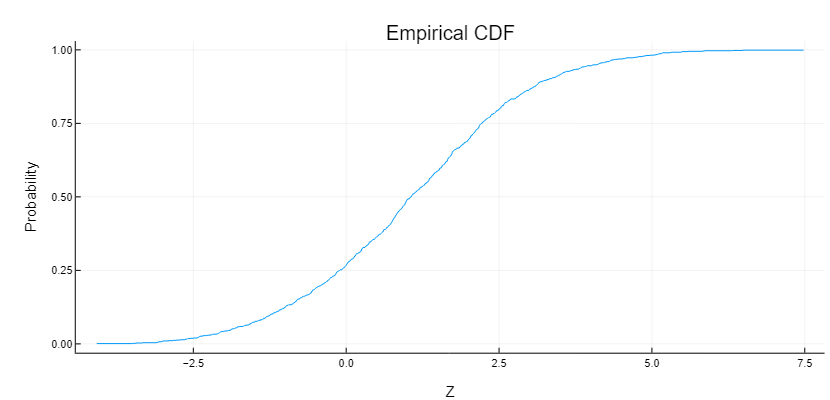

In [15]:
# implement ecdf-plot by my self.
# Pᶻs = Vector(1:n)./n
# zsₛₒᵣₜ = sort(zs)
# plot([repeat(zsₛₒᵣₜ',2)...],[[(Pᶻs.-1/n)';Pᶻs']...],legend=false)

ecdfplot(zs,legend=false)
title!("Empirical CDF")
xlabel!("Z")
ylabel!("Probability")

Fitting curve use MLE method.

In [16]:
# calculate average of samples: zs
μ_=mean(zs);
# calculate variance of samples: zs
σ²_=var(zs);
print("̂μ = $μ_ ,̂σ² = $σ²_")

̂μ = 1.0823002210837673 ,̂σ² = 3.119287113132184

In [21]:
function cdfplot(dis::UnivariateDistribution,args...;kw...)
    plot(x->cdf(dis,x),args...;kw...)
end

function cdfplot!(dis::UnivariateDistribution,args...;kw...)
    plot!(x->cdf(dis,x),args...;kw...)
end

cdfplot! (generic function with 1 method)

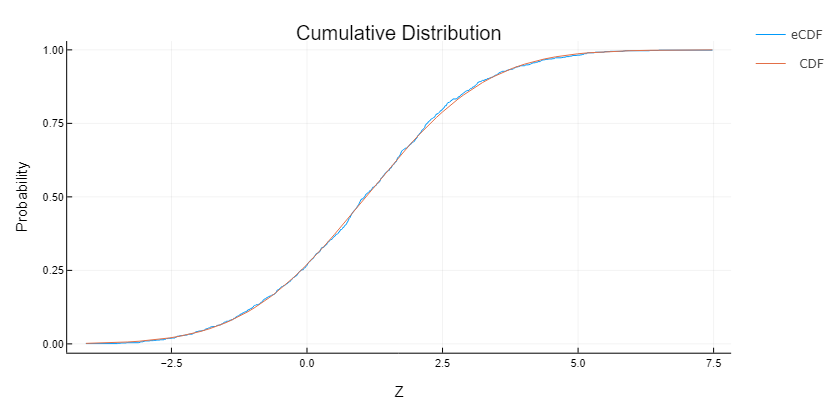

In [22]:
ecdfplot(zs,label="eCDF")
cdfplot!(Normal(μ_,√σ²_),label="  CDF")
title!("Cumulative Distribution")
xlabel!("Z")
ylabel!("Probability")

> where eCDF is the statistical sampling plot and CDF is the fitting curve.

Meanwhile, we can use `fit` function to fit a distribution to a given set of samples

In [13]:
d = fit(Normal,zs)

Normal{Float64}(μ=1.0190820860837881, σ=1.7360586234183963)

The result by build-in method is same as the result we calculate by MLE.

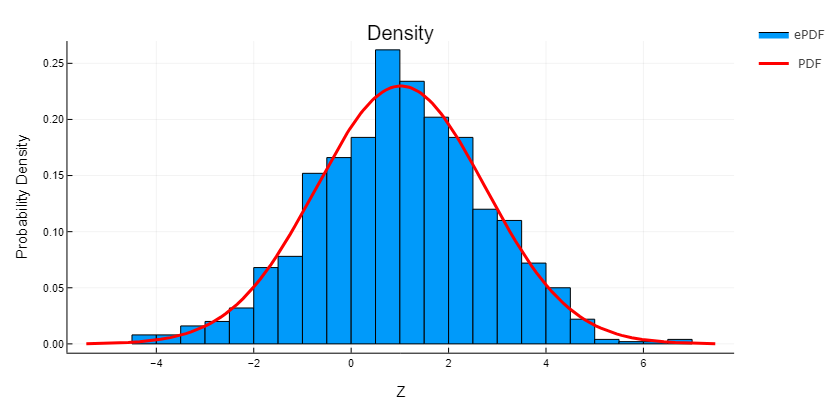

In [15]:
histogram(zs,normalize=:pdf,label="ePDF")
plot!(fit(Normal,zs),lw=3,color=:red,label=" PDF")
title!("Density")
xlabel!("Z")
ylabel!("Probability Density")

> where ePDF is the statistical sampling plot and PDF is the fitting curve.